In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m



In [2]:
df_test = pd.read_csv('5297Q_2010-11.txt',
                      usecols =["DATUM","MESSWERT_NUM"] ,
                      index_col=0, 
                      parse_dates=True, 
                      infer_datetime_format=True,
                      dayfirst=True,
                      decimal='.',
                      sep=",")

In [3]:
df_test

,MESSWERT_NUM
DATUM,
2010-01-01,448.59
2010-01-02,448.60
2010-01-03,448.60
2010-01-04,448.60
2010-01-05,448.60
2010-01-06,448.59
2010-01-07,448.59
2010-01-08,448.59
2010-01-09,448.58


In [43]:
X = np.array(df_test.index.values - df_test.index.values.min() , dtype=(float)) / (1e9 * 60 * 60 * 24)

df_test = df_test.assign(X =X[:])
noise_mean = 0
noise_std = 1
df_test["Y"] = 0. 
df_test["noise"] = np.random.randn(len(df_test)) * noise_std + noise_mean
df_test["confidence95"] = noise_std * 1.96
df_test["measurement"] = df_test["MESSWERT_NUM"] + df_test["noise"]

P = np.array( df_test.dropna().reset_index()[['DATUM','Y','MESSWERT_NUM']] )

In [47]:
def test (data = df_test, n_sample=None):
    df_z = data
    if n_sample is not None:
        df_z = data.sample(n_sample)
    return df_z    

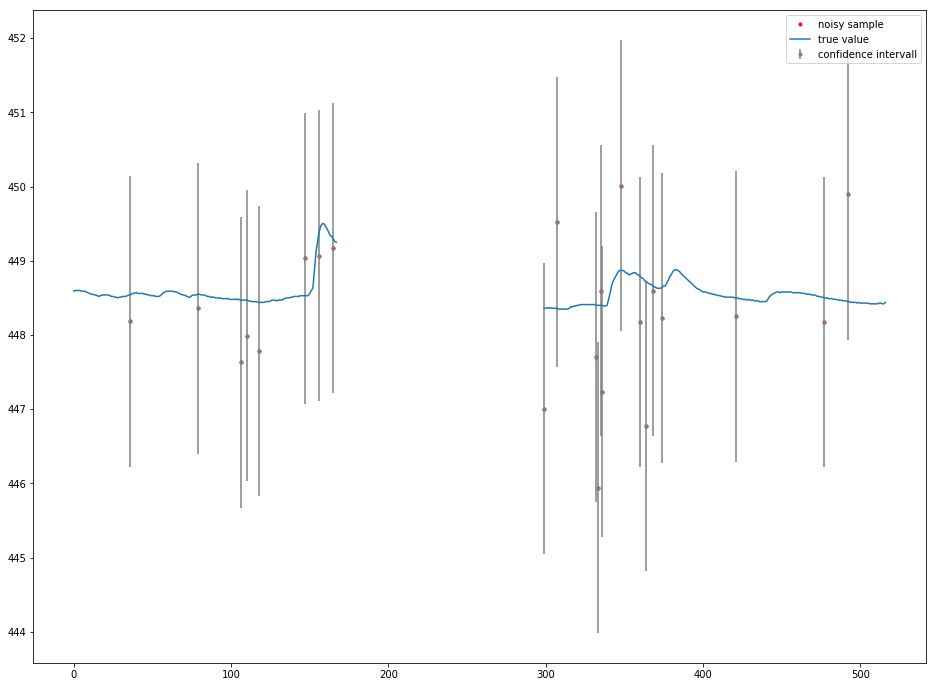

In [56]:
df_z = test(data=df_test, n_sample=25)
plt.rcParams["figure.figsize"] = (16, 12)
plt.plot(df_z.X, df_z.measurement, '.', label='noisy sample', color = "red")
plt.plot(df_test.X, df_test.MESSWERT_NUM, label="true value")
plt.errorbar(df_z.X, df_z.measurement, df_z.confidence95, fmt='.',
             label='confidence intervall', color="grey")

plt.legend()
df_z.to_excel(r".\example_data\timeseries10.xlsx")
plt.show()

In [57]:
df_z

,MESSWERT_NUM,X,Y,noise,confidence95,measurement
DATUM,,,,,,
2011-01-04,448.67,368.0,0.0,-0.072931,1.96,448.597069
2011-01-10,448.64,374.0,0.0,-0.411219,1.96,448.228781
2010-04-21,448.47,110.0,0.0,-0.477386,1.96,447.992614
2010-09-09,NaN,251.0,0.0,-1.450163,1.96,NaN
2011-04-23,448.50,477.0,0.0,-0.326091,1.96,448.173909
2010-04-29,448.44,118.0,0.0,-0.655361,1.96,447.784639
2010-05-28,448.53,147.0,0.0,0.506477,1.96,449.036477
2010-12-27,448.79,360.0,0.0,-0.615636,1.96,448.174364
2011-02-26,448.50,421.0,0.0,-0.245399,1.96,448.254601


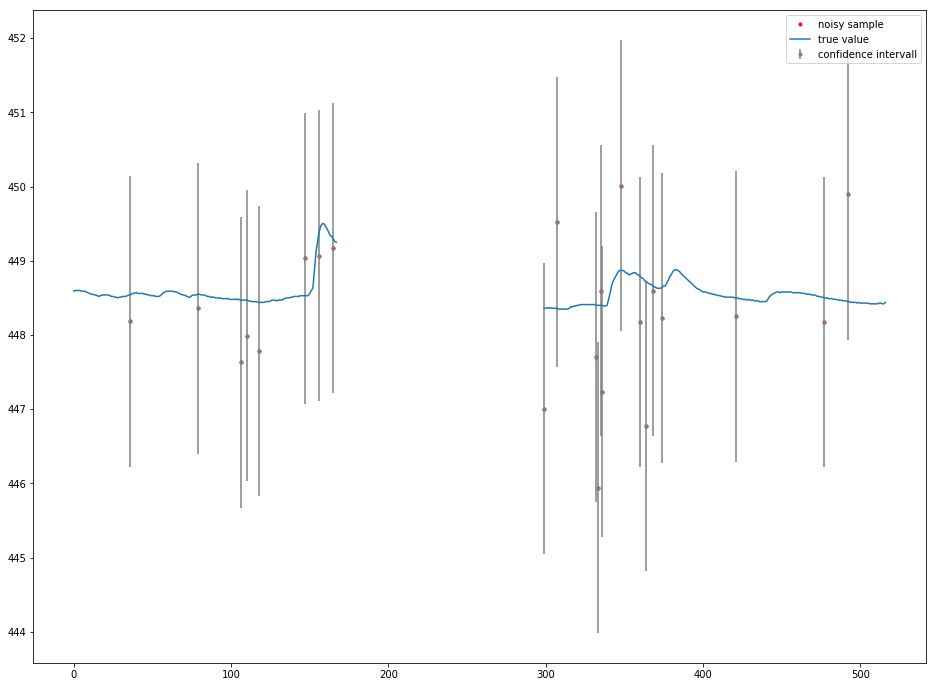

In [58]:
df_z = pd.read_excel(r".\example_data\timeseries10.xlsx")

plt.plot(df_z.X, df_z.measurement, '.', label='noisy sample', color = "red")
plt.plot(df_test.X, df_test.MESSWERT_NUM, label="true value")
plt.errorbar(df_z.X, df_z.measurement, df_z.confidence95, fmt='.',
             label='confidence intervall', color="grey")

plt.legend()
plt.show()